In [39]:
import numpy as np
from numpy import gradient
from numpy import pi
from numpy import arctan
from numpy import arctan2
from numpy import sin
from numpy import cos
from numpy import sqrt
from numpy import zeros
from numpy import uint8
import matplotlib
import matplotlib.pyplot as plt
import richdem as rd
from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource

In [40]:
matplotlib.rcParams['figure.figsize'] = (15, 15)

In [41]:
dem_path = 'DEM_10m/DEM_10m.tif'

dem = rd.LoadGDAL(dem_path)
dem.max()

rdarray(2443.531, dtype=float32)

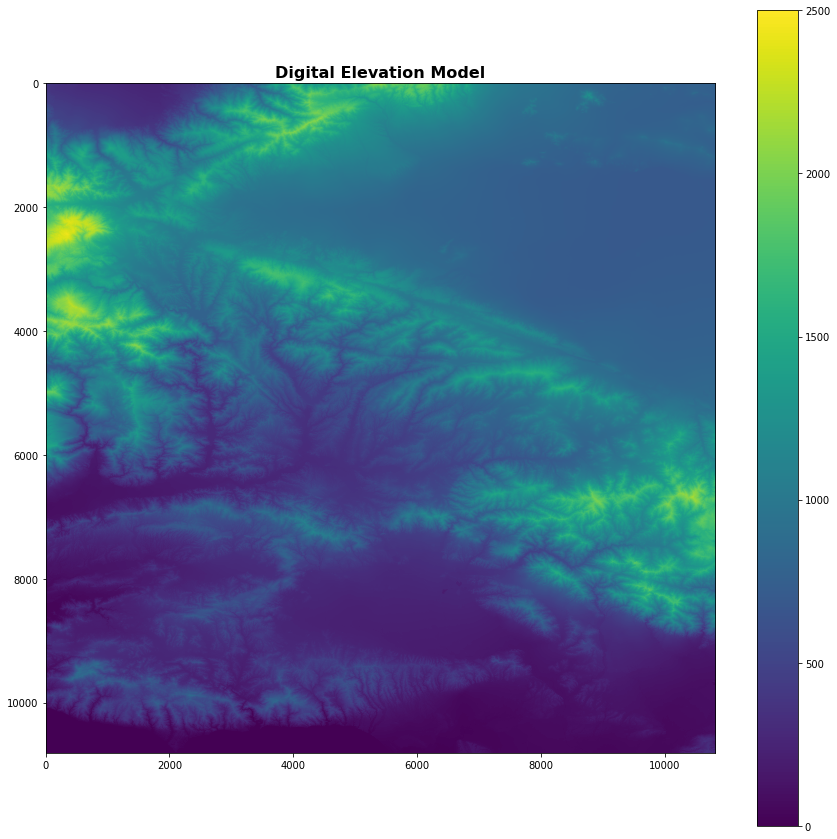

In [42]:
font = {'family': 'sans-serif',
        'weight': 'bold',
        'size': 16,
        }

plt.imshow(dem, interpolation = 'none')
plt.clim(0, 2500)
plt.colorbar()
plt.title("Digital Elevation Model", fontdict = font)
plt.show()

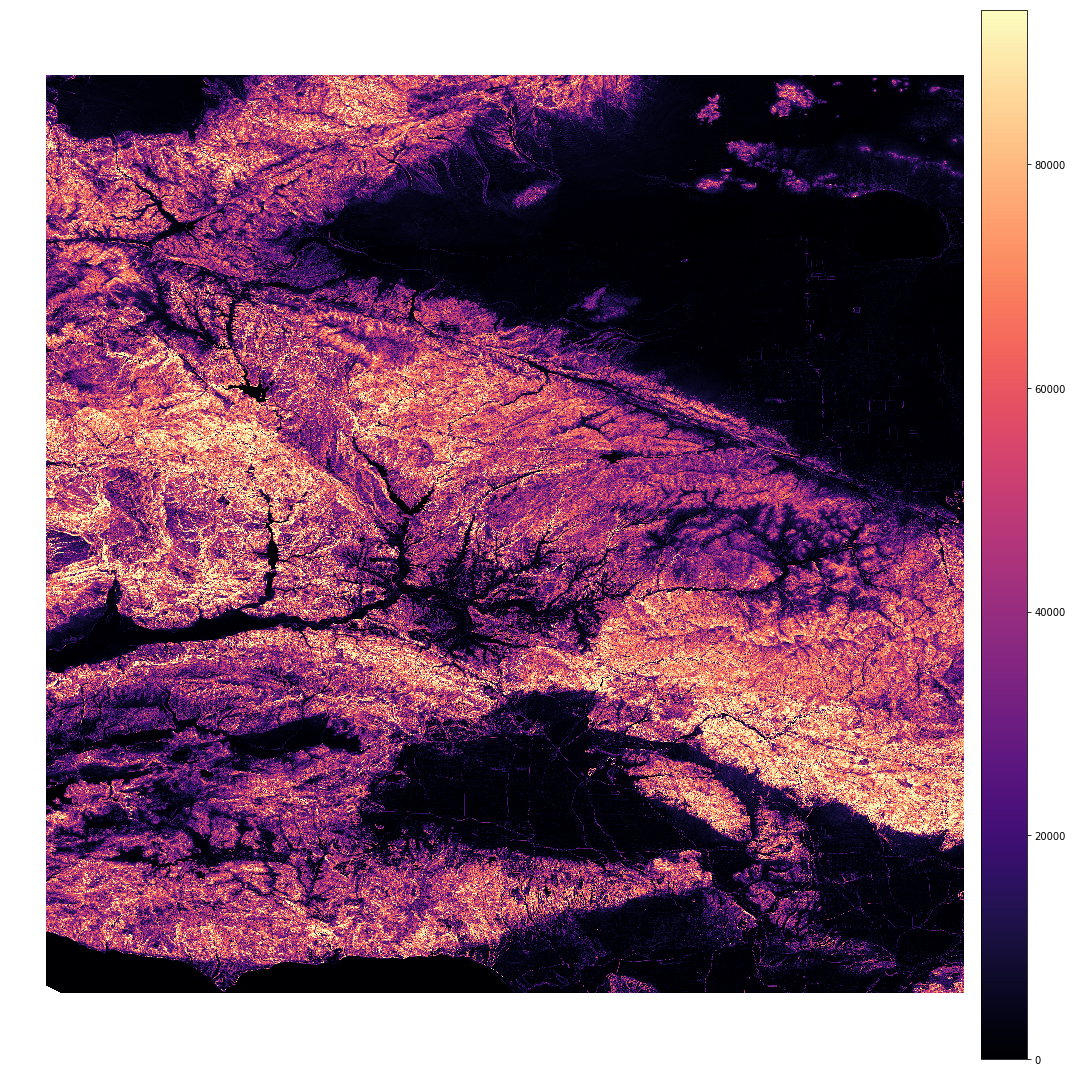

In [64]:
slope = rd.TerrainAttribute(dem, attrib = 'slope_riserun')
rd.rdShow(slope, axes = False, cmap = 'magma', figsize = (15, 15))
plt.show()

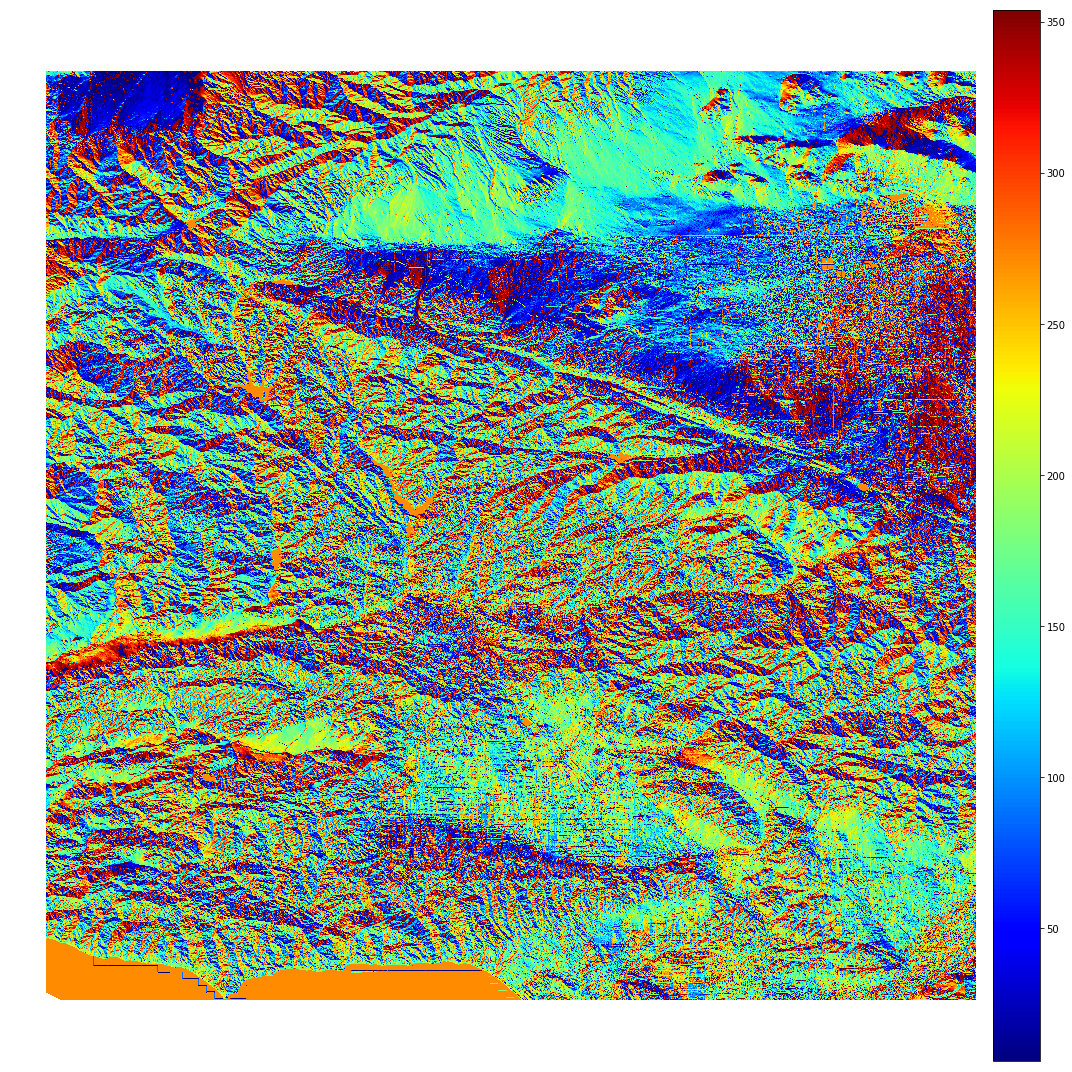

In [65]:
aspect = rd.TerrainAttribute(dem, attrib = 'aspect')
rd.rdShow(aspect, axes = False, cmap = 'jet', figsize = (15, 15))
plt.show()

In [66]:
def hillshade(array, azimuth, angle_altitude):
        
    x, y = gradient(array)
    slope = pi / 2. - arctan(sqrt(x*x + y*y))
    aspect = arctan2(-x, y)
    azimuthrad = azimuth * pi / 180.
    altituderad = angle_altitude * pi / 180.
     
 
    shaded = sin(altituderad) * sin(slope)\
     + cos(altituderad) * cos(slope)\
     * cos(azimuthrad - aspect)
    return 255*(shaded + 1)/2

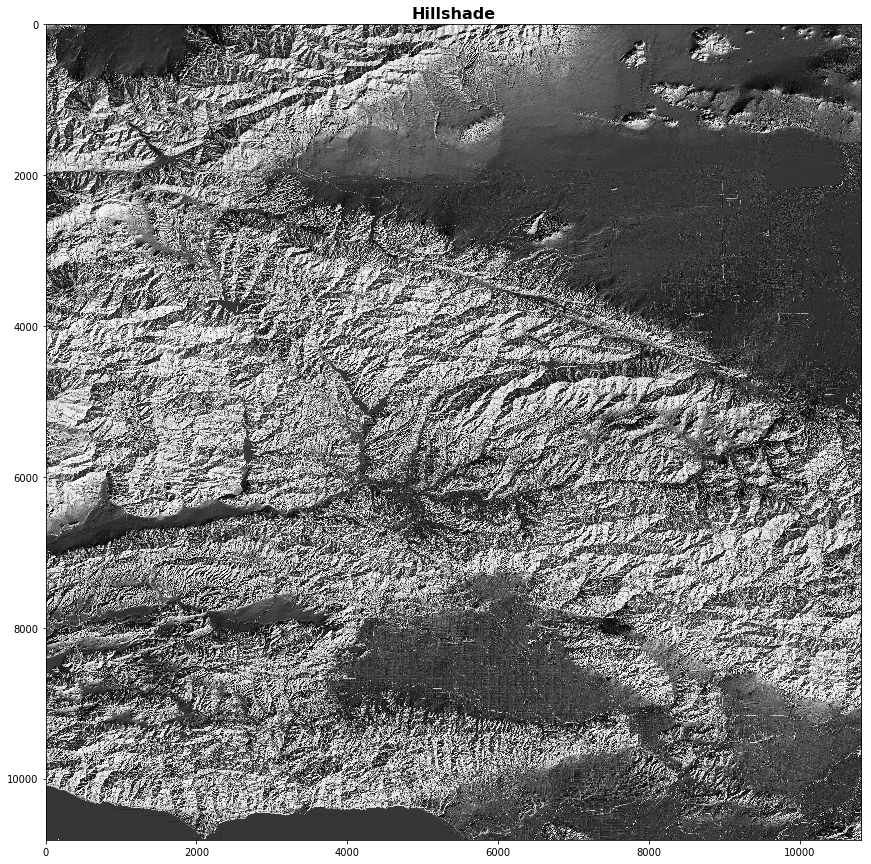

In [67]:
hillshade = hillshade(dem, 315, 45)
plt.imshow(hillshade, cmap = 'Greys')
plt.title("Hillshade", fontdict = font)
plt.show()

In [69]:
# Shade from the northwest, with the sun 45 degrees from horizontal
ls = LightSource(azdeg=315, altdeg=45)
cmap = plt.cm.gist_earth

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 9))
plt.setp(axes.flat, xticks=[], yticks=[])

# Vary vertical exaggeration and blend mode and plot all combinations
for col, ve in zip(axes.T, [0.1, 1, 10]):
    # Show the hillshade intensity image in the first row
    col[0].imshow(ls.hillshade(z, vert_exag=ve, dx=dx, dy=dy), cmap='gray')

    # Place hillshaded plots with different blend modes in the rest of the rows
    for ax, mode in zip(col[1:], ['hsv', 'overlay', 'soft']):
        rgb = ls.shade(z, cmap=cmap, blend_mode=mode,
                       vert_exag=ve, dx=dx, dy=dy)
        ax.imshow(rgb)

# Label rows and columns
for ax, ve in zip(axes[0], [0.1, 1, 10]):
    ax.set_title('{0}'.format(ve), size=18)
for ax, mode in zip(axes[:, 0], ['Hillshade', 'hsv', 'overlay', 'soft']):
    ax.set_ylabel(mode, size=18)

# Group labels...
axes[0, 1].annotate('Vertical Exaggeration', (0.5, 1), xytext=(0, 30),
                    textcoords='offset points', xycoords='axes fraction',
                    ha='center', va='bottom', size=20)
axes[2, 0].annotate('Blend Mode', (0, 0.5), xytext=(-30, 0),
                    textcoords='offset points', xycoords='axes fraction',
                    ha='right', va='center', size=20, rotation=90)
fig.subplots_adjust(bottom=0.05, right=0.95)

plt.show()

OSError: Failed to interpret file 'DEM_10m/DEM_10m.tif' as a pickle

In [70]:
dem[1,1]

460.77002

In [71]:
dem[1]

rdarray([462.43427, 460.77002, 456.58807, ..., 780.97394, 780.9723 ,
         780.8883 ], dtype=float32)